# Locally Weighted Regression Algorithm

## Objective
Implement the non-parametric Locally Weighted Regression algorithm to fit data points and visualize the results.

## How Locally Weighted Regression Works
1. **Basic Idea**: Unlike standard linear regression that uses all data points equally to find a global best fit, LWR gives nearby points more weight than distant points when fitting a model at a specific point.

2. **Key Components**:
   - **Weight Function**: Typically a Gaussian kernel that assigns weights based on distance
   - **Bandwidth Parameter (τ)**: Controls how quickly weight decreases with distance
   
3. **Algorithm Steps**:
   - For each prediction point x:
     - Calculate weights for all training points based on distance from x
     - Solve weighted least squares problem to find local parameters
     - Use local parameters to make prediction at x

4. **Mathematical Expression**:
   - Weight calculation: w(i) = exp(-||x - x(i)||²/(2τ²))
   - Parameter estimation: θ = (X^T W X)^(-1) X^T W y
   - Prediction: f(x) = x^T θ

## Effect of Bandwidth Parameter (τ)

The bandwidth parameter τ controls the smoothness of the fit:
- **Small τ**: More sensitive to local variations, potentially overfitting
- **Large τ**: Smoother fit, approaching global linear regression

Let's visualize different values of τ to understand its impact:

## Conclusion and Key Takeaways

**About Locally Weighted Regression:**

1. **Non-parametric Method**: LWR doesn't assume a global function form, making it more flexible

2. **Adapts to Local Structure**: By weighting nearby points more heavily, it captures local patterns

3. **Bandwidth Selection**: The bandwidth parameter τ is crucial:
   - Too small: Overfitting, high variance
   - Too large: Underfitting, high bias

4. **Computational Cost**: More expensive than global methods as we need to compute a separate model for each prediction point

5. **No Training Phase**: Unlike other models, LWR keeps all training data and performs computation at prediction time

LWR is particularly useful for datasets where the relationship varies across the input space and cannot be captured by a simple global model.

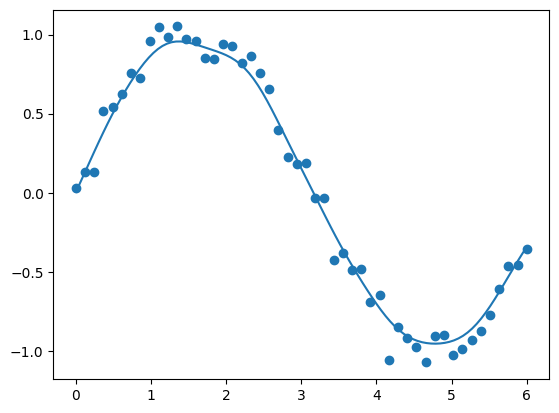

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def weight(x, xi, tau):
    return np.exp(-((x - xi)**2) / (2 * tau**2))

def predict(x, X, y, tau):
    w = [weight(x, xi, tau) for xi in X]
    W = np.diag(w)
    X_ = np.c_[np.ones(len(X)), X]
    x_ = np.array([1, x])
    theta = np.linalg.pinv(X_.T @ W @ X_) @ X_.T @ W @ y
    return x_ @ theta

X = np.linspace(0, 6, 50)
y = np.sin(X) + 0.1 * np.random.randn(50)
X_test = np.linspace(0, 6, 100)
y_pred = [predict(x, X, y, 0.3) for x in X_test]

plt.scatter(X, y)
plt.plot(X_test, y_pred)
plt.show()